<a href="https://colab.research.google.com/github/zoyamasood/linearRegression/blob/main/04_hedonic_pricing_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



Part 1 - clean data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/airbnb_hw.csv')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [4]:
df.dropna(inplace=True)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df['price'] = df['price'].str.replace(',', '').astype(float)
df.head()

,host_id,host_since,name,neighbourhood_,property_type,review_scores_rating_(bin),room_type,zipcode,beds,number_of_records,number_of_reviews,price,review_scores_rating
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149.0,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250.0,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90.0,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270.0,90.0


In [5]:
print(df.describe())

            host_id  review_scores_rating_(bin)       zipcode          beds  \
count  2.201000e+04                22010.000000  22010.000000  22010.000000   
mean   1.104878e+07                   90.733303  10575.345252      1.556747   
std    1.080069e+07                    9.069740    597.744310      1.043374   
min    5.000000e+02                   20.000000   7105.000000      0.000000   
25%    2.242476e+06                   85.000000  10016.000000      1.000000   
50%    6.901950e+06                   90.000000  10044.000000      1.000000   
75%    1.808719e+07                  100.000000  11216.000000      2.000000   
max    4.272660e+07                  100.000000  11694.000000     16.000000   

       number_of_records  number_of_reviews         price  \
count            22010.0       22010.000000  22010.000000   
mean                 1.0          16.459382    154.762699   
std                  0.0          24.230400    148.993525   
min                  1.0           1.000000 

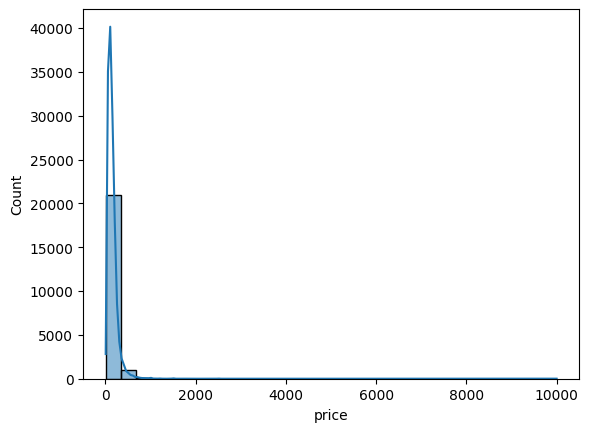

In [6]:
sns.histplot(df['price'], bins=30, kde=True)
plt.show()

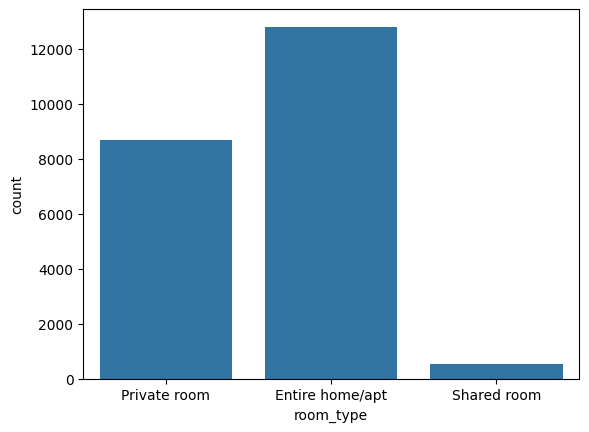

In [7]:
sns.countplot(x='room_type', data=df)
plt.show()

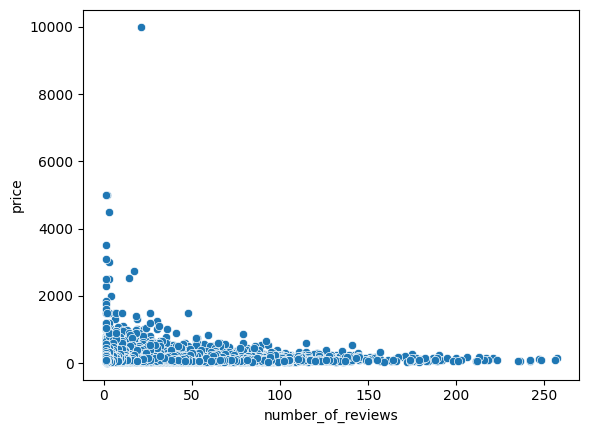

In [8]:
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.show()

Part 2 - transforming variables

In [9]:
y = df['price']
X = pd.get_dummies(df['room_type'], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_,
                        'coefficient': reg.coef_})
results

,variable,coefficient
0,Entire home/apt,203.471094
1,Private room,88.264275
2,Shared room,67.900185


In [10]:
y = df['price']
X = pd.get_dummies(df['room_type'], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_,
                        'coefficient': reg.coef_})
results

,variable,coefficient
0,Private room,-115.206819
1,Shared room,-135.570909


Part 3 and 4 - 80/20 split of data and make linear models

In [12]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['price']
X = df.loc[:,['number_of_reviews', 'room_type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

Z_train = pd.concat([X_train['number_of_reviews'],
                     pd.get_dummies(X_train['room_type'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['number_of_reviews'],
                    pd.get_dummies(X_test['room_type'], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

# fitting model on test data
y_hat_test = reg.predict(Z_test)
print('Rsq Test: ', reg.score(Z_test,y_test))
rmse_test = np.sqrt( np.mean( (y_test - y_hat_test)**2 ))
print('RMSE Test: ', rmse_test)
results_test = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results_test

# fitting model on training data
y_hat_train = reg.predict(Z_train)
print('Rsq Train: ', reg.score(Z_train,y_train))
rmse_train = np.sqrt( np.mean( (y_train - y_hat_train)**2 ))
print('RMSE Train: ', rmse_train)
results_train = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results_train

Rsq Test:  0.2379162312772105
RMSE Test:  98.63684450664528
Rsq Train:  0.13756945626451933
RMSE Train:  145.51808000874598


,variable,coefficient
0,number_of_reviews,-0.083359
1,Entire home/apt,206.047118
2,Private room,89.758311
3,Shared room,69.190639


It is clear that the test data has better performance since it has a lower RMSE and higher Rsq.

Part 5 - more complex model (regression based on entire apt/house)

In [13]:
y = df['price']
X = df.loc[:,['number_of_reviews', 'room_type', 'neighbourhood_'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

Z_train = pd.concat([X_train['number_of_reviews'],
                    pd.get_dummies(X_train['room_type'], dtype='int'),
                    pd.get_dummies(X_train['neighbourhood_'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['number_of_reviews'],
                    pd.get_dummies(X_test['room_type'], dtype='int'),
                    pd.get_dummies(X_test['neighbourhood_'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.27751178714959845
RMSE:  96.0402313172141


,variable,coefficient
0,number_of_reviews,-0.110965
1,Entire home/apt,148.410860
2,Private room,39.781719
3,Shared room,18.292009
4,Bronx,9.893140
5,Brooklyn,33.765875
6,Manhattan,75.969131
7,Queens,14.368334
8,Staten Island,72.488109


Comparing the complex model to the previous questions test model because they are calculated in the same way. Both models are trained using the training data and then tested using the testing data.

So, we can conclude that the more complex model did perform better than the simplier model since it has a higher Rsq and lower RMSE.

Part 6

Based on parts 1-5, I have learned that more complex models perform better because they have more flexibility to understand relationships within the data. It is clear that the simplar model is underfitting since there are other factors that can impact price, not just room type, as indicated by the more complex model. Additionally, model selection is highly important to avoid under or overfitting. It is essential for a model to strike a good balance between Rsq and RMSE to ensure this.